In [ ]:
## data source :https://finance.yahoo.com/quote/NFLX/history?period1=1022112000&period2=1590796800&interval=1d&filter=history&frequency=1d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import autocorrelation_plot

#from pandas.plotting import lag_plot
#from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


import numpy as np
from pandas import Series

In [2]:
netflix_stocks = pd.read_csv('https://raw.githubusercontent.com/nlucian/time-series-analysis/master/NFLX.csv')

In [3]:
netflix_stocks['Date'] =  pd.to_datetime(netflix_stocks['Date'])

In [4]:
netflix_stocks.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4526,2020-05-15,440.700012,455.000000,437.510010,454.190002,454.190002,7244000
4527,2020-05-18,451.160004,456.359985,443.350006,452.579987,452.579987,7780300
4528,2020-05-19,453.399994,458.970001,450.470001,451.040009,451.040009,4810500
4529,2020-05-20,454.250000,455.809998,444.000000,447.670013,447.670013,5607300
4530,2020-05-21,448.559998,448.959991,430.250000,436.250000,436.250000,9117300
4531,2020-05-22,437.000000,439.089996,427.179993,429.320007,429.320007,5422300
4532,2020-05-26,427.769989,428.500000,413.140015,414.769989,414.769989,7881100
4533,2020-05-27,410.380005,420.019989,397.859985,419.890015,419.890015,10446300
4534,2020-05-28,417.239990,422.369995,411.500000,413.440002,413.440002,5655100
4535,2020-05-29,417.459991,420.239990,411.850006,419.730011,419.730011,5045192


In [5]:
netflix_stocks_indexed = netflix_stocks.copy()


netflix_stocks_indexed = netflix_stocks_indexed.set_index('Date')
netflix_stocks_indexed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2020-05-22,437.000000,439.089996,427.179993,429.320007,429.320007,5422300
2020-05-26,427.769989,428.500000,413.140015,414.769989,414.769989,7881100
2020-05-27,410.380005,420.019989,397.859985,419.890015,419.890015,10446300


In [6]:
netflix_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4531,2020-05-22,437.000000,439.089996,427.179993,429.320007,429.320007,5422300
4532,2020-05-26,427.769989,428.500000,413.140015,414.769989,414.769989,7881100
4533,2020-05-27,410.380005,420.019989,397.859985,419.890015,419.890015,10446300
4534,2020-05-28,417.239990,422.369995,411.500000,413.440002,413.440002,5655100


In [7]:
netflix_closing_df = netflix_stocks[['Date', 'Close']]

In [8]:
netflix_closing_df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
4531,2020-05-22,429.320007
4532,2020-05-26,414.769989
4533,2020-05-27,419.890015
4534,2020-05-28,413.440002


In [9]:
netflix_stocks_indexed[['Close']]

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
...,...
2020-05-22,429.320007
2020-05-26,414.769989
2020-05-27,419.890015


### Stationarity

In [10]:
# I. graphic analysis 
#     looking at the stock price graph we notice that there's no seasonality but
#     * there's an obvious TREND => we need to remove the trend
#     * no seasonality

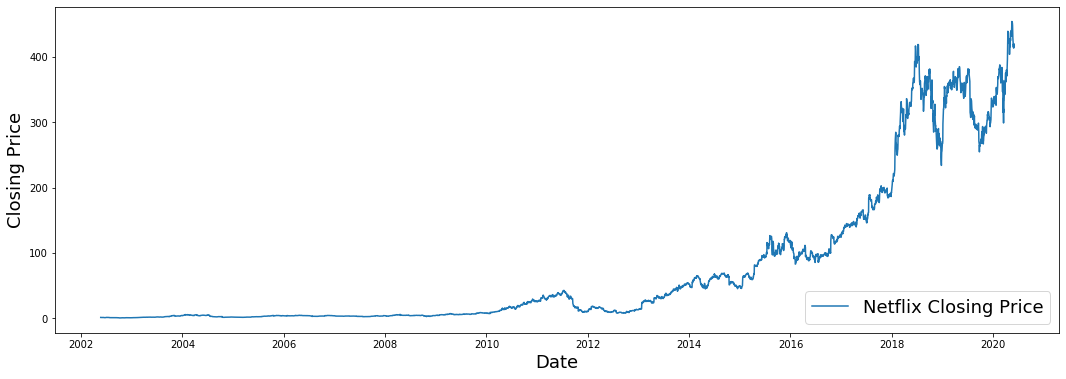

In [11]:
plt.figure(figsize=(18,6))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(netflix_stocks_indexed[['Close']], label = 'Netflix Closing Price')
plt.legend(loc=4, prop={'size': 18})

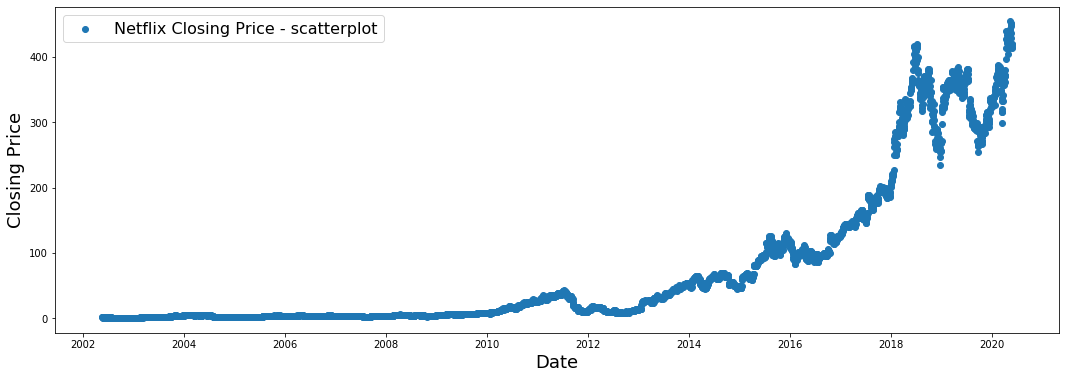

In [12]:
plt.figure(figsize=(18,6))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.scatter(netflix_closing_df['Date'], netflix_closing_df['Close'] ,label = 'Netflix Closing Price - scatterplot')
plt.legend(loc=2, prop={'size': 16})

### White Noise?

In [13]:
## not really -> the mean is not even close to 0 
## MEAN
netflix_closing_mean = netflix_closing_df.mean()

In [14]:
print("Netflix stock prices have a mean of {}".format(netflix_closing_mean))

Netflix stock prices have a mean of Close    74.185514
dtype: float64


### Correlation

In [15]:
days = np.arange(len(netflix_closing_df['Date']))
print(len(days))
print(len(netflix_closing_df['Close']))
np.corrcoef(netflix_closing_df['Close'], days)

4536
4536


array([[1.        , 0.79367761],
       [0.79367761, 1.        ]])

### Autocorrelation / correlogram

In [16]:
days = np.arange(len(netflix_closing_df['Date']))
print(len(days))

4536


In [17]:
shift = 1

initial_closing_price           = netflix_closing_df['Close'][shift:]
initial_closing_price_minus_1   = netflix_closing_df['Close'][:-shift]

In [18]:
initial_closing_price.to_numpy()
initial_closing_price_minus_1

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
4530    436.250000
4531    429.320007
4532    414.769989
4533    419.890015
4534    413.440002
Name: Close, Length: 4535, dtype: float64

In [ ]:
plt.figure(figsize=(18,6))

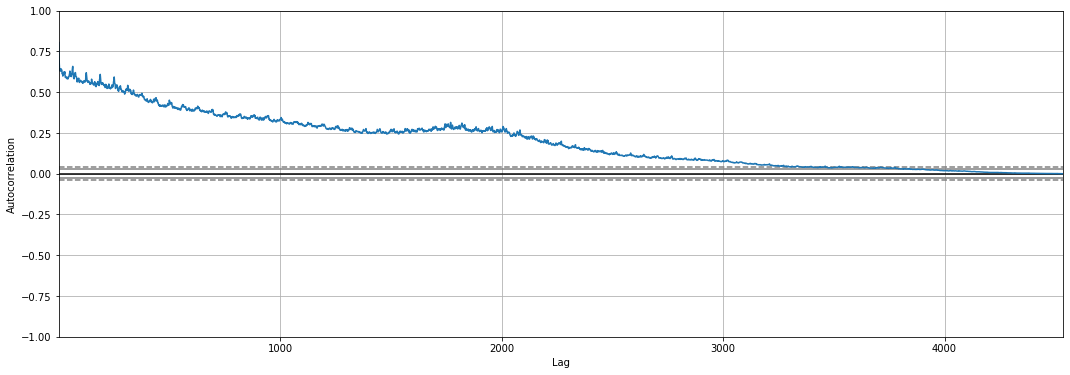

In [19]:
plt.figure(figsize=(18,6))
autocorrelation_plot(netflix_stocks_indexed)

In [20]:
# max_shifts = 4000

# autocorrelation_values = []
# for x in range(1, max_shifts):
#     a = netflix_closing_df['Close'][:-x]
#     b = netflix_closing_df['Close'][x:]
#     corr = np.corrcoef(a, b)[0, 1]
#     autocorrelation_values.append(corr)

In [21]:
# plt.figure(figsize=(18,6))
# plt.plot(autocorrelation_values)

In [22]:
plt.figure(figsize=(18,6))
acorr_plot = plt.acorr(netflix_stocks_indexed['Close'], maxlags = max_shifts)

NameError: name 'max_shifts' is not defined

<Figure size 1296x432 with 0 Axes>

In [ ]:
# looking at the correlation graphics it's obvious that the DS is not a white-noise
# also it's decreasing -> which is what we want and what is obvious

### Partial autocorrelation

In [23]:
netflix_stocks['Close']

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
4531    429.320007
4532    414.769989
4533    419.890015
4534    413.440002
4535    419.730011
Name: Close, Length: 4536, dtype: float64

<Figure size 1296x432 with 0 Axes>

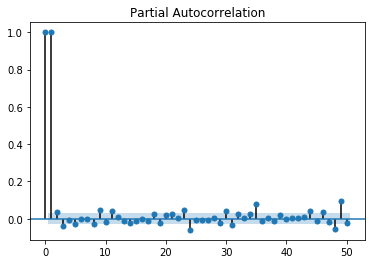

In [29]:
#plt.figure(figsize=(18,6))
#plt.figure(figsize=(18,6))
trash_var = plot_pacf(netflix_stocks['Close'], lags=50)

### Removing Trend from the ds

In [ ]:
# we don't have seasonality, just a trend so we need to remove it and
# transform our dataset into a trend-stationarity ds

In [ ]:
z = netflix_stocks_indexed.copy()

In [ ]:
z['Close']

In [ ]:
netflix_indexed_differentiated_close = z['Close'] - z['Close'].shift()

In [ ]:
netflix_indexed_differentiated_close = netflix_indexed_differentiated_close[1:]
netflix_indexed_differentiated_close

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(netflix_indexed_differentiated_close)

In [ ]:
# Here the null hypothesis is that the TS is non-stationary. 
# The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
# If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that 
# the series is stationary.

def isStationary(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    for key, value in result[4].items():
        if result[0] > value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
        print('Critical values:')
        for key,value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [ ]:
# before differentiation
isStationary(netflix_stocks_indexed['Close'])

In [ ]:
# after differentiation
isStationary(netflix_indexed_differentiated_close)

### Dataframe indicators

In [ ]:
netflix_closing_df['Close'].describe()

In [ ]:
# netflix_stocks2 = pd.read_csv('https://raw.githubusercontent.com/nlucian/time-series-analysis/master/NFLX.csv', usecols=["Date", "Close"],
#         parse_dates=["Date"], header=0,  squeeze=True,  index_col=0,)

### Partial Autocorrelation

In [ ]:
netflix_indexed_differentiated_close

### Stationarity double check

In [ ]:
# When a time series is stationary, it can be easier to model. 
# Statistical modeling methods assume or require the time series to be stationary to be effective.

In [ ]:
size = int(len(netflix_indexed_differentiated_close) / 2)

print(size)

In [ ]:
split1 = netflix_indexed_differentiated_close[:size]
split2 = netflix_indexed_differentiated_close[size:]

In [ ]:
split1.mean()

In [ ]:
split2.mean()

In [ ]:
# the dataset is clearly stationary now - we also checked after differentiation
# if the mean is the same for two splits of the ds